In [1]:
import numpy as np
from paddle import fluid
import matplotlib.pyplot as plt

## Create data

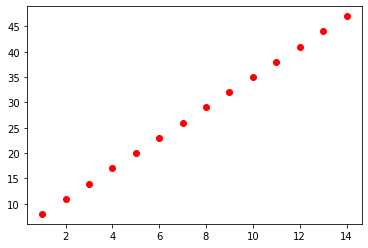

In [2]:
x = np.arange(1,15).reshape(-1, 1)
y = x*3 + 5  # linear relationship

plt.scatter(x, y, color='r')

## Matrix method

### Define variables, coefficients and equation

In [3]:
data_x = fluid.data(name='x', shape=[1], dtype='float32')
data_y = fluid.data(name='y', shape=[1], dtype='float32')

k = fluid.layers.create_parameter(shape=[1], dtype='float32', name='k')
b = fluid.layers.create_parameter(shape=[1], dtype='float32', name='b')

# equation (k*x+b) returns prediction values
# y_pred should be close to data_y
y_pred = fluid.layers.elementwise_add(fluid.layers.matmul(data_x, k), b)

# Least squares method
cost = fluid.layers.mean(fluid.layers.square_error_cost(input=y_pred, label=data_y))
sgd = fluid.optimizer.SGD(learning_rate=0.01)
_ = sgd.minimize(cost)

### Define executor

In [4]:
cpu = fluid.CPUPlace()
exe = fluid.Executor(cpu)

# initilize the variables: k and b
exe.run(fluid.default_startup_program())
main_p = fluid.default_main_program()

In [5]:
# For test only
test_p = main_p.clone(for_test=True)

### Assignment and calculation

In [6]:
for i in range(100):
    cost_ = 0
    for j in range(x.shape[0]):
        feed_x = x[j].astype(np.float32)
        feed_y = y[j].astype(np.float32)
        outs = exe.run(program = main_p,
                       feed={'x': feed_x,
                             'y': feed_y},
                       fetch_list=[cost]
                       )
        cost_ += outs[0][0]/x.shape[0]
    print('--------%d--------cost: %0.4f'%(i, cost_))

--------0--------cost: 31.8374
--------1--------cost: 2.3966
--------2--------cost: 2.2072
--------3--------cost: 2.0327
--------4--------cost: 1.8720
--------5--------cost: 1.7240
--------6--------cost: 1.5877
--------7--------cost: 1.4622
--------8--------cost: 1.3466
--------9--------cost: 1.2401
--------10--------cost: 1.1421
--------11--------cost: 1.0518
--------12--------cost: 0.9686
--------13--------cost: 0.8921
--------14--------cost: 0.8215
--------15--------cost: 0.7566
--------16--------cost: 0.6968
--------17--------cost: 0.6417
--------18--------cost: 0.5910
--------19--------cost: 0.5443
--------20--------cost: 0.5012
--------21--------cost: 0.4616
--------22--------cost: 0.4251
--------23--------cost: 0.3915
--------24--------cost: 0.3605
--------25--------cost: 0.3321
--------26--------cost: 0.3058
--------27--------cost: 0.2816
--------28--------cost: 0.2594
--------29--------cost: 0.2389
--------30--------cost: 0.2200
--------31--------cost: 0.2026
--------32-------

In [7]:
k_, b_ = exe.run(program=test_p,
                 feed={'x': x[0].astype(np.float32),
                       'y': y[0].astype(np.float32)},
                 fetch_list=[k, b],
                )
k_, b_

(array([3.0042386], dtype=float32), array([4.933001], dtype=float32))

### Prediction

In [8]:
# input
# exe.run(program=test_p,feed = {'x':np.array([15]).astype(np.float32),'y':y[0].astype(np.float32)},fetch_list=[y_pred])
exe.run(program=test_p,
        feed={'x': np.array([20]).astype(np.float32),
              'y': y[0].astype(np.float32),
             },
        fetch_list=[y_pred],
       )

[array([65.01777], dtype=float32)]

$$f(x) =kx+b$$
k = 3, b =5

## fc method

### Define variables, coefficients and equation

**!!! Restart the kernel and run codes below !!!**

In [1]:
import numpy as np
from paddle import fluid

In [2]:
x = np.arange(1,15).reshape(-1, 1)
y = x*3 + 5  # linear relationship

data_x = fluid.data(name='x', shape=[1,1], dtype='float32')
data_y = fluid.data(name='y', shape=[1,1], dtype='float32')

# create k and b automatically
y_pred = fluid.layers.fc(input=data_x, size=1)

# Least squares method
cost = fluid.layers.mean(fluid.layers.square_error_cost(input=y_pred, label=data_y))
sgd = fluid.optimizer.SGD(learning_rate=0.01)
_ = sgd.minimize(cost)

### Define executor

In [3]:
cpu = fluid.CPUPlace()
exe = fluid.Executor(cpu)

# initilize the variables: k and b
exe.run(fluid.default_startup_program())
main_p = fluid.default_main_program()

In [4]:
# For test only
test_p = main_p.clone(for_test=True)

### Assignment and calculation

In [5]:
for i in range(100):
    cost_ = 0
    for j in range(x.shape[0]):
        feed_x = x[j].astype(np.float32).reshape(1,1)
        feed_y = y[j].astype(np.float32).reshape(1,1)
        outs = exe.run(program = main_p,
                       feed={'x': feed_x,
                             'y': feed_y},
                       fetch_list=[cost]
                       )
        cost_ += outs[0][0]/x.shape[0]
    print('--------%d--------cost: %0.4f'%(i, cost_))

--------0--------cost: 62.9600
--------1--------cost: 2.0007
--------2--------cost: 1.8426
--------3--------cost: 1.6969
--------4--------cost: 1.5627
--------5--------cost: 1.4392
--------6--------cost: 1.3254
--------7--------cost: 1.2207
--------8--------cost: 1.1242
--------9--------cost: 1.0353
--------10--------cost: 0.9534
--------11--------cost: 0.8780
--------12--------cost: 0.8086
--------13--------cost: 0.7447
--------14--------cost: 0.6858
--------15--------cost: 0.6316
--------16--------cost: 0.5817
--------17--------cost: 0.5357
--------18--------cost: 0.4933
--------19--------cost: 0.4544
--------20--------cost: 0.4184
--------21--------cost: 0.3854
--------22--------cost: 0.3549
--------23--------cost: 0.3268
--------24--------cost: 0.3010
--------25--------cost: 0.2772
--------26--------cost: 0.2553
--------27--------cost: 0.2351
--------28--------cost: 0.2165
--------29--------cost: 0.1994
--------30--------cost: 0.1836
--------31--------cost: 0.1691
--------32-------

### Prediction

In [6]:
# input
exe.run(program=test_p,
        feed={'x': np.array([[20]]).astype(np.float32),
              'y': y[0].astype(np.float32).reshape(1,1),
             },
        fetch_list=[y_pred],
       )

[array([[65.01606]], dtype=float32)]